In [1]:
#必要なライブラリのインポート
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import datasets
from sklearn.model_selection import ShuffleSplit #ShuffleSplitクラスの呼び出し
from sklearn import svm, metrics #svmとmetricsを呼び出す
from sklearn.metrics import plot_confusion_matrix #混同行列の呼び出し
from sklearn.model_selection import train_test_split # train_test_splitの読み込み
from sklearn.ensemble import RandomForestClassifier #ランダムフォレストを使うためのライブラリ
from sklearn.model_selection import LeaveOneOut #交差検証(LeaveOneOut)を使うためのライブラリ
from sklearn.model_selection import cross_val_score #交差検証に必要なライブラリ
from sklearn.model_selection import learning_curve, GridSearchCV

In [2]:
#emotion_labelデータの読みこみ

data2_d_label_50 = pd.read_csv('emotion_label/session2/D/emotion_D_20201111_2_50.csv')
data2_d_label_60 = pd.read_csv('emotion_label/session2/D/emotion_D_20201111_2_60.csv')
data2_d_label_70 = pd.read_csv('emotion_label/session2/D/emotion_D_20201111_2_70.csv')
data2_d_label_80 = pd.read_csv('emotion_label/session2/D/emotion_D_20201111_2_80.csv')

# data2_a_label_50 = pd.read_csv('emotion_label/session1/D/emotion_D_20201111_2_50.csv')
# data2_a_label_60 = pd.read_csv('emotion_label/session1/D/emotion_D_20201111_2_60.csv')
# data2_a_label_70 = pd.read_csv('emotion_label/session1/D/emotion_D_20201111_2_70.csv')
# data2_a_label_80 = pd.read_csv('emotion_label/session1/D/emotion_D_20201111_2_80.csv')

#feature_data(特徴量データーセット)の読みこみ
data2_d_record_all_feature_50 = pd.read_csv('feature/D/data2_d_50_record_all_feature.csv')
data2_d_record_all_feature_60 = pd.read_csv('feature/D/data2_d_60_record_all_feature.csv')
data2_d_record_all_feature_70 = pd.read_csv('feature/D/data2_d_70_record_all_feature.csv')
data2_d_record_all_feature_80 = pd.read_csv('feature/D/data2_d_80_record_all_feature.csv')

# data2_a_record_all_feature_50 = pd.read_csv('feature/session1/D/data2_a_50_record_all_feature.csv')
# data2_a_record_all_feature_60 = pd.read_csv('feature/session1/D/data2_a_60_record_all_feature.csv')
# data2_a_record_all_feature_70 = pd.read_csv('feature/session1/D/data2_a_70_record_all_feature.csv')
# data2_a_record_all_feature_80 = pd.read_csv('feature/session1/D/data2_a_80_record_all_feature.csv')

# feature_emg = pd.read_csv("feature_emg.csv")

#確認
display(data2_d_record_all_feature_50)
display(data2_d_label_50)

,start_time,finish_time,gyrx_mean,gyry_mean,gyrz_mean,gyrn_mean,gyrx_var,gyry_var,gyrz_var,gyrn_var,gyrx_max,gyry_max,gyrz_max,gyrn_max,gyrx_min,gyry_min,gyrz_min,gyrn_min,gyrn_max_fq,gyrn_max_peak
0,2020-11-11 15:15:26,2020-11-11 15:15:30,-83.949,137.696,-8.688,572.344678,1.802753e+05,3.324574e+05,10051.078656,2.212884e+05,1688,3073,351,3074.087019,-1884,-1914,-483,16.155494,1.565558,223.900951
1,2020-11-11 15:15:27,2020-11-11 15:15:31,-78.158,179.754,-6.277,628.775782,1.844770e+05,4.218617e+05,10503.038271,2.599424e+05,1688,3073,351,3074.087019,-1884,-1914,-483,16.155494,0.391389,295.092728
2,2020-11-11 15:15:28,2020-11-11 15:15:32,-68.295,50.187,-10.756,855.482044,3.606875e+05,1.043829e+06,11838.762464,6.918042e+05,3359,3073,351,7128.801442,-3384,-7060,-483,16.155494,3.131115,330.932346
3,2020-11-11 15:15:29,2020-11-11 15:15:33,-83.214,99.147,-3.277,872.554779,3.624962e+05,1.069976e+06,8103.514271,6.959890e+05,3359,2921,272,7128.801442,-3384,-7060,-349,16.155494,3.131115,249.560027
4,2020-11-11 15:15:30,2020-11-11 15:15:34,-82.211,124.011,8.670,840.063648,3.350011e+05,1.041900e+06,6435.723100,6.998420e+05,3359,2921,272,7128.801442,-3384,-7060,-276,49.819675,1.565558,544.763024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,2020-11-11 15:29:48,2020-11-11 15:29:52,-86.638,133.310,8.483,621.719634,1.387882e+05,3.996686e+05,5989.719711,1.832609e+05,1389,2780,205,2780.244594,-1506,-1103,-258,19.697716,2.739726,152.106735
631,2020-11-11 15:29:49,2020-11-11 15:29:53,-67.069,162.840,12.955,580.898722,1.071504e+05,3.750900e+05,4961.860975,1.809419e+05,1188,2780,205,2780.244594,-1171,-1103,-197,19.697716,0.391389,198.667325
632,2020-11-11 15:29:50,2020-11-11 15:29:54,-77.482,149.689,8.854,548.984497,1.088385e+05,3.428324e+05,4872.686684,1.836483e+05,1524,2780,217,2780.244594,-1469,-1688,-306,19.697716,0.391389,273.291607
633,2020-11-11 15:29:51,2020-11-11 15:29:55,-54.681,9.205,3.352,916.221562,9.563447e+05,1.393730e+06,11526.438096,1.525225e+06,7371,4061,626,8495.287223,-8091,-8005,-569,19.697716,0.391389,456.293027


,start_time,finish_time,emotion_level,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,3:42,3:46,4,NaN,NaN,NaN
1,3:43,3:47,4,NaN,NaN,NaN
2,3:44,3:48,4,NaN,NaN,NaN
3,3:45,3:49,4,NaN,NaN,NaN
4,3:46,3:50,4,NaN,NaN,NaN
...,...,...,...,...,...,...
630,18:04,18:08,0,NaN,NaN,NaN
631,18:05,18:09,0,NaN,NaN,NaN
632,18:06,18:10,0,NaN,NaN,NaN
633,18:07,18:11,0,NaN,NaN,NaN


In [3]:
#欠損値削除
def dropna(label):
    a = label.dropna(how='all', axis=1)
    return a

data2_d_label_50 = dropna(data2_d_label_50)
data2_d_label_60 = dropna(data2_d_label_60)
data2_d_label_70 = dropna(data2_d_label_70)
data2_d_label_80 = dropna(data2_d_label_80)

# data2_a_label_50 = dropna(data2_a_label_50)
# data2_a_label_60 = dropna(data2_a_label_60)
# data2_a_label_70 = dropna(data2_c_label_70)
# data2_a_label_80 = dropna(data2_d_label_80)

In [4]:
#欠損値削除
def dropna(label):
    a = label.dropna(how='all', axis=0)
    return a

data2_d_label_50 = dropna(data2_d_label_50)
data2_d_label_60 = dropna(data2_d_label_60)
data2_d_label_70 = dropna(data2_d_label_70)
data2_d_label_80 = dropna(data2_d_label_80)

# data2_a_label_50 = dropna(data2_a_label_50)
# data2_a_label_60 = dropna(data2_a_label_60)
# data2_a_label_70 = dropna(data2_c_label_70)
# data2_a_label_80 = dropna(data2_d_label_80)

In [5]:
#emotion_labelデータからtimeHMSとsubject列を消去

data2_d_label_50 = data2_d_label_50.drop(["start_time", "finish_time"], axis=1)
data2_d_label_60 = data2_d_label_60.drop(["start_time", "finish_time"], axis=1)
data2_d_label_70 = data2_d_label_70.drop(["start_time", "finish_time"], axis=1)
data2_d_label_80 = data2_d_label_80.drop(["start_time", "finish_time"], axis=1)

# data2_a_label_50 = data2_a_label_50.drop(["start_time", "finish_time"], axis=1)
# data2_a_label_60 = data2_a_label_60.drop(["start_time", "finish_time"], axis=1)
# data2_a_label_70 = data2_a_label_70.drop(["start_time", "finish_time"], axis=1)
# data2_a_label_80 = data2_a_label_80.drop(["start_time", "finish_time"], axis=1)

#確認
data2_d_label_50

,emotion_level
0,4
1,4
2,4
3,4
4,4
...,...
630,0
631,0
632,0
633,0


In [6]:
#feature_dataとemotion_labelデータを連結
data2_d_record_all_feature_50 = pd.concat([data2_d_record_all_feature_50, data2_d_label_50], axis=1, ignore_index=False)
data2_d_record_all_feature_60 = pd.concat([data2_d_record_all_feature_60, data2_d_label_60], axis=1, ignore_index=False)
data2_d_record_all_feature_70 = pd.concat([data2_d_record_all_feature_70, data2_d_label_70], axis=1, ignore_index=False)
data2_d_record_all_feature_80 = pd.concat([data2_d_record_all_feature_80, data2_d_label_80], axis=1, ignore_index=False)

# data2_a_record_all_feature_50 = pd.concat([data2_a_record_all_feature_50, data2_a_label_50], axis=1, ignore_index=False)
# data2_a_record_all_feature_60 = pd.concat([data2_a_record_all_feature_60, data2_a_label_60], axis=1, ignore_index=False)
# data2_a_record_all_feature_70 = pd.concat([data2_a_record_all_feature_70, data2_a_label_70], axis=1, ignore_index=False)
# data2_a_record_all_feature_80 = pd.concat([data2_a_record_all_feature_80, data2_a_label_80], axis=1, ignore_index=False)

#データの確認(確認のためセッション1のDさんのデータを表示している)
display(data2_d_record_all_feature_50)

,start_time,finish_time,gyrx_mean,gyry_mean,gyrz_mean,gyrn_mean,gyrx_var,gyry_var,gyrz_var,gyrn_var,...,gyry_max,gyrz_max,gyrn_max,gyrx_min,gyry_min,gyrz_min,gyrn_min,gyrn_max_fq,gyrn_max_peak,emotion_level
0,2020-11-11 15:15:26,2020-11-11 15:15:30,-83.949,137.696,-8.688,572.344678,1.802753e+05,3.324574e+05,10051.078656,2.212884e+05,...,3073,351,3074.087019,-1884,-1914,-483,16.155494,1.565558,223.900951,4
1,2020-11-11 15:15:27,2020-11-11 15:15:31,-78.158,179.754,-6.277,628.775782,1.844770e+05,4.218617e+05,10503.038271,2.599424e+05,...,3073,351,3074.087019,-1884,-1914,-483,16.155494,0.391389,295.092728,4
2,2020-11-11 15:15:28,2020-11-11 15:15:32,-68.295,50.187,-10.756,855.482044,3.606875e+05,1.043829e+06,11838.762464,6.918042e+05,...,3073,351,7128.801442,-3384,-7060,-483,16.155494,3.131115,330.932346,4
3,2020-11-11 15:15:29,2020-11-11 15:15:33,-83.214,99.147,-3.277,872.554779,3.624962e+05,1.069976e+06,8103.514271,6.959890e+05,...,2921,272,7128.801442,-3384,-7060,-349,16.155494,3.131115,249.560027,4
4,2020-11-11 15:15:30,2020-11-11 15:15:34,-82.211,124.011,8.670,840.063648,3.350011e+05,1.041900e+06,6435.723100,6.998420e+05,...,2921,272,7128.801442,-3384,-7060,-276,49.819675,1.565558,544.763024,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,2020-11-11 15:29:48,2020-11-11 15:29:52,-86.638,133.310,8.483,621.719634,1.387882e+05,3.996686e+05,5989.719711,1.832609e+05,...,2780,205,2780.244594,-1506,-1103,-258,19.697716,2.739726,152.106735,0
631,2020-11-11 15:29:49,2020-11-11 15:29:53,-67.069,162.840,12.955,580.898722,1.071504e+05,3.750900e+05,4961.860975,1.809419e+05,...,2780,205,2780.244594,-1171,-1103,-197,19.697716,0.391389,198.667325,0
632,2020-11-11 15:29:50,2020-11-11 15:29:54,-77.482,149.689,8.854,548.984497,1.088385e+05,3.428324e+05,4872.686684,1.836483e+05,...,2780,217,2780.244594,-1469,-1688,-306,19.697716,0.391389,273.291607,0
633,2020-11-11 15:29:51,2020-11-11 15:29:55,-54.681,9.205,3.352,916.221562,9.563447e+05,1.393730e+06,11526.438096,1.525225e+06,...,4061,626,8495.287223,-8091,-8005,-569,19.697716,0.391389,456.293027,0


In [7]:
data2_d_record_all_feature_60

,start_time,finish_time,gyrx_mean,gyry_mean,gyrz_mean,gyrn_mean,gyrx_var,gyry_var,gyrz_var,gyrn_var,...,gyry_max,gyrz_max,gyrn_max,gyrx_min,gyry_min,gyrz_min,gyrn_min,gyrn_max_fq,gyrn_max_peak,emotion_level
0,2020-11-11 15:15:27,2020-11-11 15:15:31,-78.158,179.754,-6.277,628.775782,1.844770e+05,4.218617e+05,10503.038271,2.599424e+05,...,3073,351,3074.087019,-1884,-1914,-483,16.155494,0.391389,295.092728,4
1,2020-11-11 15:15:28,2020-11-11 15:15:32,-68.295,50.187,-10.756,855.482044,3.606875e+05,1.043829e+06,11838.762464,6.918042e+05,...,3073,351,7128.801442,-3384,-7060,-483,16.155494,3.131115,330.932346,4
2,2020-11-11 15:15:29,2020-11-11 15:15:33,-83.214,99.147,-3.277,872.554779,3.624962e+05,1.069976e+06,8103.514271,6.959890e+05,...,2921,272,7128.801442,-3384,-7060,-349,16.155494,3.131115,249.560027,4
3,2020-11-11 15:15:30,2020-11-11 15:15:34,-82.211,124.011,8.670,840.063648,3.350011e+05,1.041900e+06,6435.723100,6.998420e+05,...,2921,272,7128.801442,-3384,-7060,-276,49.819675,1.565558,544.763024,4
4,2020-11-11 15:15:31,2020-11-11 15:15:35,-60.279,122.559,18.521,803.746125,3.062537e+05,1.020409e+06,6320.669559,7.059725e+05,...,2921,327,7128.801442,-3384,-7060,-276,34.597688,0.782779,644.794166,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2020-11-11 15:29:48,2020-11-11 15:29:52,-86.638,133.310,8.483,621.719634,1.387882e+05,3.996686e+05,5989.719711,1.832609e+05,...,2780,205,2780.244594,-1506,-1103,-258,19.697716,2.739726,152.106735,0
610,2020-11-11 15:29:49,2020-11-11 15:29:53,-67.069,162.840,12.955,580.898722,1.071504e+05,3.750900e+05,4961.860975,1.809419e+05,...,2780,205,2780.244594,-1171,-1103,-197,19.697716,0.391389,198.667325,0
611,2020-11-11 15:29:50,2020-11-11 15:29:54,-77.482,149.689,8.854,548.984497,1.088385e+05,3.428324e+05,4872.686684,1.836483e+05,...,2780,217,2780.244594,-1469,-1688,-306,19.697716,0.391389,273.291607,0
612,2020-11-11 15:29:51,2020-11-11 15:29:55,-54.681,9.205,3.352,916.221562,9.563447e+05,1.393730e+06,11526.438096,1.525225e+06,...,4061,626,8495.287223,-8091,-8005,-569,19.697716,0.391389,456.293027,0


In [8]:
print(len(data2_d_record_all_feature_50))
print(len(data2_d_record_all_feature_60))
print(len(data2_d_record_all_feature_70))
print(len(data2_d_record_all_feature_80))

635
614
592
570


In [9]:
#時間でデータを切り出している
#38→上から37行目までを抜き出している
data2_d_50_record_all_feature_1 = data2_d_record_all_feature_50.iloc[0:211]
data2_d_50_record_all_feature_2 = data2_d_record_all_feature_50.iloc[211:422]
data2_d_50_record_all_feature_3 = data2_d_record_all_feature_50.iloc[422:635]

data2_d_60_record_all_feature_1 = data2_d_record_all_feature_60.iloc[0:204]
data2_d_60_record_all_feature_2 = data2_d_record_all_feature_60.iloc[204:408]
data2_d_60_record_all_feature_3 = data2_d_record_all_feature_60.iloc[408:614]

data2_d_70_record_all_feature_1 = data2_d_record_all_feature_70.iloc[0:197]
data2_d_70_record_all_feature_2 = data2_d_record_all_feature_70.iloc[197:394]
data2_d_70_record_all_feature_3 = data2_d_record_all_feature_70.iloc[394:592]

data2_d_80_record_all_feature_1 = data2_d_record_all_feature_80.iloc[0:190]
data2_d_80_record_all_feature_2 = data2_d_record_all_feature_80.iloc[190:380]
data2_d_80_record_all_feature_3 = data2_d_record_all_feature_80.iloc[380:570]


# data2_d_50_record_all_feature_1 = data2_d_record_all_feature_50.iloc[0:150]
# data2_d_50_record_all_feature_2 = data2_d_record_all_feature_50.iloc[150:300]
# data2_d_50_record_all_feature_3 = data2_d_record_all_feature_50.iloc[300:470]

# data2_d_60_record_all_feature_1 = data2_d_record_all_feature_60.iloc[0:150]
# data2_d_60_record_all_feature_2 = data2_d_record_all_feature_60.iloc[150:300]
# data2_d_60_record_all_feature_3 = data2_d_record_all_feature_60.iloc[300:470]

# data2_d_70_record_all_feature_1 = data2_d_record_all_feature_70.iloc[0:150]
# data2_d_70_record_all_feature_2 = data2_d_record_all_feature_70.iloc[150:300]
# data2_d_70_record_all_feature_3 = data2_d_record_all_feature_70.iloc[300:470]

# data2_d_80_record_all_feature_1 = data2_d_record_all_feature_80.iloc[0:150]
# data2_d_80_record_all_feature_2 = data2_d_record_all_feature_80.iloc[150:300]
# data2_d_80_record_all_feature_3 = data2_d_record_all_feature_80.iloc[300:470]

In [10]:
# data2_a_50_record_all_feature_1 = data2_a_record_all_feature_50.iloc[0:38]
# data2_a_50_record_all_feature_2 = data2_a_record_all_feature_50.iloc[38:687]
# data2_a_50_record_all_feature_3 = data2_a_record_all_feature_50.iloc[471:687]

# data2_a_60_record_all_feature_1 = data2_a_record_all_feature_60.iloc[0:38]
# data2_a_60_record_all_feature_2 = data2_a_record_all_feature_60.iloc[38:687]
# data2_a_60_record_all_feature_3 = data2_a_record_all_feature_60.iloc[471:687]

# data2_a_70_record_all_feature_1 = data2_a_record_all_feature_70.iloc[0:38]
# data2_a_70_record_all_feature_2 = data2_a_record_all_feature_70.iloc[38:687]
# data2_a_70_record_all_feature_3 = data2_a_record_all_feature_70.iloc[471:687]

# data2_a_80_record_all_feature_1 = data2_a_record_all_feature_80.iloc[0:38]
# data2_a_80_record_all_feature_2 = data2_a_record_all_feature_80.iloc[38:687]
# data2_a_80_record_all_feature_3 = data2_a_record_all_feature_80.iloc[471:687]

In [11]:
# emotion_levelの列の数値によってlabelを振り分けている
# emotion_levelの列の数値が2より大きいときはpositive
# emotion_levelの列の数値が3より小さいときはother

def emotion_level_define(data_record_all_feature):
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] > 2, "label"] = "positive"
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] <3, "label"] = "other"
    return data_record_all_feature

data2_d_50_record_all_feature_1 = emotion_level_define(data2_d_50_record_all_feature_1)
data2_d_50_record_all_feature_2 = emotion_level_define(data2_d_50_record_all_feature_2)
data2_d_50_record_all_feature_3 = emotion_level_define(data2_d_50_record_all_feature_3)

data2_d_60_record_all_feature_1 = emotion_level_define(data2_d_60_record_all_feature_1)
data2_d_60_record_all_feature_2 = emotion_level_define(data2_d_60_record_all_feature_2)
data2_d_60_record_all_feature_3 = emotion_level_define(data2_d_60_record_all_feature_3)

data2_d_70_record_all_feature_1 = emotion_level_define(data2_d_70_record_all_feature_1)
data2_d_70_record_all_feature_2 = emotion_level_define(data2_d_70_record_all_feature_2)
data2_d_70_record_all_feature_3 = emotion_level_define(data2_d_70_record_all_feature_3)

data2_d_80_record_all_feature_1 = emotion_level_define(data2_d_80_record_all_feature_1)
data2_d_80_record_all_feature_2 = emotion_level_define(data2_d_80_record_all_feature_2)
data2_d_80_record_all_feature_3 = emotion_level_define(data2_d_80_record_all_feature_3)

# data2_a_50_record_all_feature_1 = emotion_level_define(data2_a_50_record_all_feature_1)
# data2_a_50_record_all_feature_2 = emotion_level_define(data2_a_50_record_all_feature_2)
# data2_a_50_record_all_feature_3 = emotion_level_define(data2_a_50_record_all_feature_3)

# data2_a_60_record_all_feature_1 = emotion_level_define(data2_a_60_record_all_feature_1)
# data2_a_60_record_all_feature_2 = emotion_level_define(data2_a_60_record_all_feature_2)
# data2_a_60_record_all_feature_3 = emotion_level_define(data2_a_60_record_all_feature_3)

# data2_a_70_record_all_feature_1 = emotion_level_define(data2_a_70_record_all_feature_1)
# data2_a_70_record_all_feature_2 = emotion_level_define(data2_a_70_record_all_feature_2)
# data2_a_70_record_all_feature_3 = emotion_level_define(data2_a_70_record_all_feature_3)

# data2_a_80_record_all_feature_1 = emotion_level_define(data2_a_80_record_all_feature_1)
# data2_a_80_record_all_feature_2 = emotion_level_define(data2_a_80_record_all_feature_2)
# data2_a_80_record_all_feature_3 = emotion_level_define(data2_a_80_record_all_feature_3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [12]:
#特徴量データからemotion_level列を消去
def emotion_level_drop(data_record_all_feature):
    data_record_all_feature.drop(["emotion_level"], axis=1, inplace=True)
    return data_record_all_feature


data2_d_50_record_all_feature_1 = emotion_level_drop(data2_d_50_record_all_feature_1)
data2_d_50_record_all_feature_2 = emotion_level_drop(data2_d_50_record_all_feature_2)
data2_d_50_record_all_feature_3 = emotion_level_drop(data2_d_50_record_all_feature_3)

data2_d_60_record_all_feature_1 = emotion_level_drop(data2_d_60_record_all_feature_1)
data2_d_60_record_all_feature_2 = emotion_level_drop(data2_d_60_record_all_feature_2)
data2_d_60_record_all_feature_3 = emotion_level_drop(data2_d_60_record_all_feature_3)

data2_d_70_record_all_feature_1 = emotion_level_drop(data2_d_70_record_all_feature_1)
data2_d_70_record_all_feature_2 = emotion_level_drop(data2_d_70_record_all_feature_2)
data2_d_70_record_all_feature_3 = emotion_level_drop(data2_d_70_record_all_feature_3)

data2_d_80_record_all_feature_1 = emotion_level_drop(data2_d_80_record_all_feature_1)
data2_d_80_record_all_feature_2 = emotion_level_drop(data2_d_80_record_all_feature_2)
data2_d_80_record_all_feature_3 = emotion_level_drop(data2_d_80_record_all_feature_3)

# data2_a_50_record_all_feature_1 = emotion_level_drop(data2_a_50_record_all_feature_1)
# data2_a_50_record_all_feature_2 = emotion_level_drop(data2_a_50_record_all_feature_2)
# data2_a_50_record_all_feature_3 = emotion_level_drop(data2_a_50_record_all_feature_3)

# data2_a_60_record_all_feature_1 = emotion_level_drop(data2_a_60_record_all_feature_1)
# data2_a_60_record_all_feature_2 = emotion_level_drop(data2_a_60_record_all_feature_2)
# data2_a_60_record_all_feature_3 = emotion_level_drop(data2_a_60_record_all_feature_3)

# data2_a_70_record_all_feature_1 = emotion_level_drop(data2_a_70_record_all_feature_1)
# data2_a_70_record_all_feature_2 = emotion_level_drop(data2_a_70_record_all_feature_2)
# data2_a_70_record_all_feature_3 = emotion_level_drop(data2_a_70_record_all_feature_3)

# data2_a_80_record_all_feature_1 = emotion_level_drop(data2_a_80_record_all_feature_1)
# data2_a_80_record_all_feature_2 = emotion_level_drop(data2_a_80_record_all_feature_2)
# data2_a_80_record_all_feature_3 = emotion_level_drop(data2_a_80_record_all_feature_3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
data2_d_50_record_all_feature_1

,start_time,finish_time,gyrx_mean,gyry_mean,gyrz_mean,gyrn_mean,gyrx_var,gyry_var,gyrz_var,gyrn_var,...,gyry_max,gyrz_max,gyrn_max,gyrx_min,gyry_min,gyrz_min,gyrn_min,gyrn_max_fq,gyrn_max_peak,label
0,2020-11-11 15:15:26,2020-11-11 15:15:30,-83.949000,137.696000,-8.688000,572.344678,180275.272399,3.324574e+05,10051.078656,2.212884e+05,...,3073,351,3074.087019,-1884,-1914,-483,16.155494,1.565558,223.900951,positive
1,2020-11-11 15:15:27,2020-11-11 15:15:31,-78.158000,179.754000,-6.277000,628.775782,184477.009036,4.218617e+05,10503.038271,2.599424e+05,...,3073,351,3074.087019,-1884,-1914,-483,16.155494,0.391389,295.092728,positive
2,2020-11-11 15:15:28,2020-11-11 15:15:32,-68.295000,50.187000,-10.756000,855.482044,360687.471975,1.043829e+06,11838.762464,6.918042e+05,...,3073,351,7128.801442,-3384,-7060,-483,16.155494,3.131115,330.932346,positive
3,2020-11-11 15:15:29,2020-11-11 15:15:33,-83.214000,99.147000,-3.277000,872.554779,362496.170204,1.069976e+06,8103.514271,6.959890e+05,...,2921,272,7128.801442,-3384,-7060,-349,16.155494,3.131115,249.560027,positive
4,2020-11-11 15:15:30,2020-11-11 15:15:34,-82.211000,124.011000,8.670000,840.063648,335001.074479,1.041900e+06,6435.723100,6.998420e+05,...,2921,272,7128.801442,-3384,-7060,-276,49.819675,1.565558,544.763024,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,2020-11-11 15:20:16,2020-11-11 15:20:20,-33.550000,-82.152000,62.353000,545.398036,122382.797500,3.223596e+05,21969.912391,1.810158e+05,...,957,559,3044.793096,-1152,-3036,-379,16.000000,0.391389,233.594792,positive
207,2020-11-11 15:20:17,2020-11-11 15:20:21,-57.223000,-52.967000,23.993000,767.430842,190561.293271,8.883339e+05,65466.482951,5.620673e+05,...,4402,583,4598.150172,-1658,-3036,-1203,16.000000,0.391389,98.612695,positive
208,2020-11-11 15:20:18,2020-11-11 15:20:22,-53.119072,69.958628,57.582240,1107.122598,713883.075630,1.369914e+06,135941.316900,1.005050e+06,...,4671,2778,7211.802133,-3250,-3676,-1203,16.000000,0.782779,180.603184,positive
209,2020-11-11 15:20:19,2020-11-11 15:20:23,-48.702321,153.601413,47.450050,1182.289753,717799.801397,1.454873e+06,138100.699574,9.411811e+05,...,4671,2778,7211.802133,-3250,-3676,-1203,64.412732,0.391389,620.453461,positive


In [14]:
#全データからpositiveの数を確認
data2_d_50_record_all_feature_positive_1 = data2_d_50_record_all_feature_1[data2_d_50_record_all_feature_1.label == "positive"]
data2_d_50_record_all_feature_positive_1 = data2_d_50_record_all_feature_positive_1.reset_index(drop=True)
print(len(data2_d_50_record_all_feature_positive_1))

data2_d_50_record_all_feature_positive_2 = data2_d_50_record_all_feature_2[data2_d_50_record_all_feature_2.label == "positive"]
data2_d_50_record_all_feature_positive_2 = data2_d_50_record_all_feature_positive_2.reset_index(drop=True)
print(len(data2_d_50_record_all_feature_positive_2))

data2_d_50_record_all_feature_positive_3 = data2_d_50_record_all_feature_3[data2_d_50_record_all_feature_3.label == "positive"]
data2_d_50_record_all_feature_positive_3 = data2_d_50_record_all_feature_positive_3.reset_index(drop=True)
print(len(data2_d_50_record_all_feature_positive_3))

data2_d_60_record_all_feature_positive_1 = data2_d_60_record_all_feature_1[data2_d_60_record_all_feature_1.label == "positive"]
data2_d_60_record_all_feature_positive_1 = data2_d_60_record_all_feature_positive_1.reset_index(drop=True)
print(len(data2_d_60_record_all_feature_positive_1))

data2_d_60_record_all_feature_positive_2 = data2_d_60_record_all_feature_2[data2_d_60_record_all_feature_2.label == "positive"]
data2_d_60_record_all_feature_positive_2 = data2_d_60_record_all_feature_positive_2.reset_index(drop=True)
print(len(data2_d_60_record_all_feature_positive_2))

data2_d_60_record_all_feature_positive_3 = data2_d_60_record_all_feature_3[data2_d_60_record_all_feature_3.label == "positive"]
data2_d_60_record_all_feature_positive_3 = data2_d_60_record_all_feature_positive_3.reset_index(drop=True)
print(len(data2_d_60_record_all_feature_positive_3))

data2_d_70_record_all_feature_positive_1 = data2_d_70_record_all_feature_1[data2_d_70_record_all_feature_1.label == "positive"]
data2_d_670_record_all_feature_positive_1 = data2_d_70_record_all_feature_positive_1.reset_index(drop=True)
print(len(data2_d_70_record_all_feature_positive_1))

data2_d_70_record_all_feature_positive_2 = data2_d_70_record_all_feature_2[data2_d_70_record_all_feature_2.label == "positive"]
data2_d_70_record_all_feature_positive_2 = data2_d_70_record_all_feature_positive_2.reset_index(drop=True)
print(len(data2_d_70_record_all_feature_positive_2))

data2_d_70_record_all_feature_positive_3 = data2_d_70_record_all_feature_3[data2_d_70_record_all_feature_3.label == "positive"]
data2_d_70_record_all_feature_positive_3 = data2_d_70_record_all_feature_positive_3.reset_index(drop=True)
print(len(data2_d_70_record_all_feature_positive_3))

data2_d_80_record_all_feature_positive_1 = data2_d_80_record_all_feature_1[data2_d_80_record_all_feature_1.label == "positive"]
data2_d_80_record_all_feature_positive_1 = data2_d_80_record_all_feature_positive_1.reset_index(drop=True)
print(len(data2_d_80_record_all_feature_positive_1))

data2_d_80_record_all_feature_positive_2 = data2_d_80_record_all_feature_2[data2_d_80_record_all_feature_2.label == "positive"]
data2_d_80_record_all_feature_positive_2 = data2_d_80_record_all_feature_positive_2.reset_index(drop=True)
print(len(data2_d_80_record_all_feature_positive_2))

data2_d_80_record_all_feature_positive_3 = data2_d_80_record_all_feature_3[data2_d_80_record_all_feature_3.label == "positive"]
data2_d_80_record_all_feature_positive_3 = data2_d_80_record_all_feature_positive_3.reset_index(drop=True)
print(len(data2_d_80_record_all_feature_positive_3))

141
99
164
136
96
161
129
93
155
123
91
150


In [15]:
# data2_a_50_record_all_feature_positive_1 = data2_a_50_record_all_feature_1[data2_a_50_record_all_feature_1.label == "positive"]
# data2_a_50_record_all_feature_positive_1 = data2_a_50_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_positive_1))

# data2_a_50_record_all_feature_positive_2 = data2_a_50_record_all_feature_2[data2_a_50_record_all_feature_2.label == "positive"]
# data2_a_50_record_all_feature_positive_2 = data2_a_50_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_positive_2))

# data2_a_50_record_all_feature_positive_3 = data2_a_50_record_all_feature_3[data2_a_50_record_all_feature_3.label == "positive"]
# data2_a_50_record_all_feature_positive_3 = data2_a_50_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_positive_3))

# data2_a_60_record_all_feature_positive_1 = data2_a_60_record_all_feature_1[data2_a_60_record_all_feature_1.label == "positive"]
# data2_a_60_record_all_feature_positive_1 = data2_a_60_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_positive_1))

# data2_a_60_record_all_feature_positive_2 = data2_a_60_record_all_feature_2[data2_a_60_record_all_feature_2.label == "positive"]
# data2_a_60_record_all_feature_positive_2 = data2_a_60_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_positive_2))

# data2_a_60_record_all_feature_positive_3 = data2_a_60_record_all_feature_3[data2_a_60_record_all_feature_3.label == "positive"]
# data2_a_60_record_all_feature_positive_3 = data2_a_60_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_positive_3))

# data2_a_70_record_all_feature_positive_1 = data2_a_70_record_all_feature_1[data2_a_70_record_all_feature_1.label == "positive"]
# data2_a_670_record_all_feature_positive_1 = data2_a_70_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_positive_1))

# data2_a_70_record_all_feature_positive_2 = data2_a_70_record_all_feature_2[data2_a_70_record_all_feature_2.label == "positive"]
# data2_a_70_record_all_feature_positive_2 = data2_a_70_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_positive_2))

# data2_a_70_record_all_feature_positive_3 = data2_a_70_record_all_feature_3[data2_a_70_record_all_feature_3.label == "positive"]
# data2_a_70_record_all_feature_positive_3 = data2_a_70_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_positive_3))

# data2_a_80_record_all_feature_positive_1 = data2_a_80_record_all_feature_1[data2_a_80_record_all_feature_1.label == "positive"]
# data2_a_80_record_all_feature_positive_1 = data2_a_80_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_positive_1))

# data2_a_80_record_all_feature_positive_2 = data2_a_80_record_all_feature_2[data2_a_80_record_all_feature_2.label == "positive"]
# data2_a_80_record_all_feature_positive_2 = data2_a_80_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_positive_2))

# data2_a_80_record_all_feature_positive_3 = data2_a_80_record_all_feature_3[data2_a_80_record_all_feature_3.label == "positive"]
# data2_a_80_record_all_feature_positive_3 = data2_a_80_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_positive_3))

In [16]:
# #全データからotherの数を確認
data2_d_50_record_all_feature_other_1 = data2_d_50_record_all_feature_1[data2_d_50_record_all_feature_1.label == "other"]
data2_d_50_record_all_feature_other_1 = data2_d_50_record_all_feature_other_1.reset_index(drop=True)
print(len(data2_d_50_record_all_feature_other_1))

data2_d_50_record_all_feature_other_2 = data2_d_50_record_all_feature_2[data2_d_50_record_all_feature_2.label == "other"]
data2_d_50_record_all_feature_other_2 = data2_d_50_record_all_feature_other_2.reset_index(drop=True)
print(len(data2_d_50_record_all_feature_other_2))

data2_d_50_record_all_feature_other_3 = data2_d_50_record_all_feature_3[data2_d_50_record_all_feature_3.label == "other"]
data2_d_50_record_all_feature_other_3 = data2_d_50_record_all_feature_other_3.reset_index(drop=True)
print(len(data2_d_50_record_all_feature_other_3))

data2_d_60_record_all_feature_other_2 = data2_d_60_record_all_feature_2[data2_d_60_record_all_feature_2.label == "other"]
data2_d_60_record_all_feature_other_2 = data2_d_60_record_all_feature_other_2.reset_index(drop=True)
print(len(data2_d_60_record_all_feature_other_2))

data2_d_60_record_all_feature_other_3 = data2_d_60_record_all_feature_3[data2_d_60_record_all_feature_3.label == "other"]
data2_d_60_record_all_feature_other_3 = data2_d_60_record_all_feature_other_3.reset_index(drop=True)
print(len(data2_d_60_record_all_feature_other_3))

data2_d_60_record_all_feature_other_1 = data2_d_60_record_all_feature_1[data2_d_60_record_all_feature_1.label == "other"]
data2_d_60_record_all_feature_other_1 = data2_d_60_record_all_feature_other_1.reset_index(drop=True)
print(len(data2_d_60_record_all_feature_other_1))

data2_d_70_record_all_feature_other_2 = data2_d_70_record_all_feature_2[data2_d_70_record_all_feature_2.label == "other"]
data2_d_70_record_all_feature_other_2 = data2_d_70_record_all_feature_other_2.reset_index(drop=True)
print(len(data2_d_70_record_all_feature_other_2))

data2_d_70_record_all_feature_other_3 = data2_d_70_record_all_feature_3[data2_d_70_record_all_feature_3.label == "other"]
data2_d_70_record_all_feature_other_3 = data2_d_70_record_all_feature_other_3.reset_index(drop=True)
print(len(data2_d_70_record_all_feature_other_3))

data2_d_70_record_all_feature_other_1 = data2_d_70_record_all_feature_1[data2_d_70_record_all_feature_1.label == "other"]
data2_d_70_record_all_feature_other_1 = data2_d_70_record_all_feature_other_1.reset_index(drop=True)
print(len(data2_d_70_record_all_feature_other_1))

data2_d_80_record_all_feature_other_2 = data2_d_80_record_all_feature_2[data2_d_80_record_all_feature_2.label == "other"]
data2_d_80_record_all_feature_other_2 = data2_d_80_record_all_feature_other_2.reset_index(drop=True)
print(len(data2_d_80_record_all_feature_other_2))

data2_d_80_record_all_feature_other_3 = data2_d_80_record_all_feature_3[data2_d_80_record_all_feature_3.label == "other"]
data2_d_80_record_all_feature_other_3 = data2_d_80_record_all_feature_other_3.reset_index(drop=True)
print(len(data2_d_80_record_all_feature_other_3))

data2_d_80_record_all_feature_other_3 = data2_d_80_record_all_feature_3[data2_d_80_record_all_feature_3.label == "other"]
data2_d_80_record_all_feature_other_3 = data2_d_80_record_all_feature_other_3.reset_index(drop=True)
print(len(data2_d_80_record_all_feature_other_3))

70
112
49
108
45
68
104
43
68
99
40
40


In [17]:
# data2_a_50_record_all_feature_other_1 = data2_a_50_record_all_feature_1[data2_a_50_record_all_feature_1.label == "other"]
# data2_a_50_record_all_feature_other_1 = data2_a_50_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_other_1))

# data2_a_50_record_all_feature_other_2 = data2_a_50_record_all_feature_2[data2_a_50_record_all_feature_2.label == "other"]
# data2_a_50_record_all_feature_other_2 = data2_a_50_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_other_2))

# data2_a_50_record_all_feature_other_3 = data2_a_50_record_all_feature_3[data2_a_50_record_all_feature_3.label == "other"]
# data2_a_50_record_all_feature_other_3 = data2_a_50_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_other_3))

# data2_a_60_record_all_feature_other_2 = data2_a_60_record_all_feature_2[data2_a_60_record_all_feature_2.label == "other"]
# data2_a_60_record_all_feature_other_2 = data2_a_60_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_other_2))

# data2_a_60_record_all_feature_other_3 = data2_a_60_record_all_feature_3[data2_a_60_record_all_feature_3.label == "other"]
# data2_a_60_record_all_feature_other_3 = data2_a_60_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_other_3))

# data2_a_60_record_all_feature_other_1 = data2_a_60_record_all_feature_1[data2_a_60_record_all_feature_1.label == "other"]
# data2_a_60_record_all_feature_other_1 = data2_a_60_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_other_1))

# data2_a_70_record_all_feature_other_2 = data2_a_70_record_all_feature_2[data2_a_70_record_all_feature_2.label == "other"]
# data2_a_70_record_all_feature_other_2 = data2_a_70_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_other_2))

# data2_a_70_record_all_feature_other_3 = data2_a_70_record_all_feature_3[data2_a_70_record_all_feature_3.label == "other"]
# data2_a_70_record_all_feature_other_3 = data2_a_70_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_other_3))

# data2_a_70_record_all_feature_other_1 = data2_a_70_record_all_feature_1[data2_a_70_record_all_feature_1.label == "other"]
# data2_a_70_record_all_feature_other_1 = data2_a_70_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_other_1))

# data2_a_80_record_all_feature_other_2 = data2_a_80_record_all_feature_2[data2_a_80_record_all_feature_2.label == "other"]
# data2_a_80_record_all_feature_other_2 = data2_a_80_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_other_2))

# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_3[data2_a_80_record_all_feature_3.label == "other"]
# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_other_3))

# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_3[data2_a_80_record_all_feature_3.label == "other"]
# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_other_3))

In [18]:
#学習データとテストデータに分ける

train_data = pd.concat([data2_d_50_record_all_feature_1, data2_d_50_record_all_feature_2], ignore_index=True)
test_data = data2_d_50_record_all_feature_3

In [19]:
train_data

,start_time,finish_time,gyrx_mean,gyry_mean,gyrz_mean,gyrn_mean,gyrx_var,gyry_var,gyrz_var,gyrn_var,...,gyry_max,gyrz_max,gyrn_max,gyrx_min,gyry_min,gyrz_min,gyrn_min,gyrn_max_fq,gyrn_max_peak,label
0,2020-11-11 15:15:26,2020-11-11 15:15:30,-83.949,137.696,-8.688,572.344678,180275.272399,3.324574e+05,10051.078656,221288.386395,...,3073,351,3074.087019,-1884,-1914,-483,16.155494,1.565558,223.900951,positive
1,2020-11-11 15:15:27,2020-11-11 15:15:31,-78.158,179.754,-6.277,628.775782,184477.009036,4.218617e+05,10503.038271,259942.366528,...,3073,351,3074.087019,-1884,-1914,-483,16.155494,0.391389,295.092728,positive
2,2020-11-11 15:15:28,2020-11-11 15:15:32,-68.295,50.187,-10.756,855.482044,360687.471975,1.043829e+06,11838.762464,691804.167718,...,3073,351,7128.801442,-3384,-7060,-483,16.155494,3.131115,330.932346,positive
3,2020-11-11 15:15:29,2020-11-11 15:15:33,-83.214,99.147,-3.277,872.554779,362496.170204,1.069976e+06,8103.514271,695988.963095,...,2921,272,7128.801442,-3384,-7060,-349,16.155494,3.131115,249.560027,positive
4,2020-11-11 15:15:30,2020-11-11 15:15:34,-82.211,124.011,8.670,840.063648,335001.074479,1.041900e+06,6435.723100,699841.963156,...,2921,272,7128.801442,-3384,-7060,-276,49.819675,1.565558,544.763024,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,2020-11-11 15:25:15,2020-11-11 15:25:19,-43.920,54.524,15.069,555.271439,159312.743600,3.029702e+05,13408.364239,172493.875751,...,2494,333,2719.805508,-1732,-1389,-495,13.114877,0.391389,333.832790,positive
418,2020-11-11 15:25:16,2020-11-11 15:25:20,-65.133,14.733,33.582,508.072346,155145.855311,2.016491e+05,7903.481276,112148.062901,...,1890,333,2222.359332,-1732,-1389,-239,13.114877,0.391389,164.201108,positive
419,2020-11-11 15:25:17,2020-11-11 15:25:21,-76.098,77.088,28.230,560.419091,158086.232396,2.630915e+05,8485.075100,128123.688462,...,1890,333,2222.359332,-1732,-1639,-239,13.114877,0.391389,224.189421,positive
420,2020-11-11 15:25:18,2020-11-11 15:25:22,-74.550,47.635,17.519,558.561525,150548.369500,2.683467e+05,8155.907639,123193.693201,...,1890,333,2222.359332,-1732,-1639,-239,13.114877,0.391389,251.933285,positive


In [20]:
# X_train = train_data.iloc[0:,2:30]
# y_train = train_data.label

# X_test = test_data.iloc[0:,2:30]
# y_test = test_data.label

X_train = train_data.iloc[0:,2:20]
y_train = train_data.label

X_test = test_data.iloc[0:,2:20]
y_test = test_data.label

# X_train = train_data.iloc[0:,2:28]
# y_train = test_data.iloc[0:,2:28]

# X_test = train_data.label
# y_test = test_data.label

In [21]:
# random = RandomForestClassifier(random_state=42)
# loo=LeaveOneOut()

# score = cross_val_score(random, X, y, cv = 5)
# print(score.mean())
# print(score)

正答率0.5070422535211268
誤った個数：105
classification report
              precision    recall  f1-score   support

       other       0.12      0.18      0.15        49
    positive       0.71      0.60      0.65       164

    accuracy                           0.51       213
   macro avg       0.42      0.39      0.40       213
weighted avg       0.58      0.51      0.54       213

Confusion matrix, without normalization
[[ 9 40]
 [65 99]]


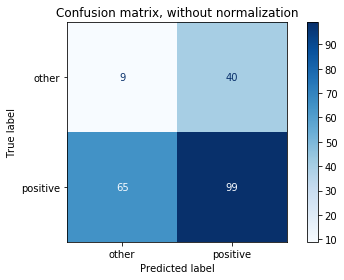

Normalized confusion matrix
[[0.18367347 0.81632653]
 [0.39634146 0.60365854]]


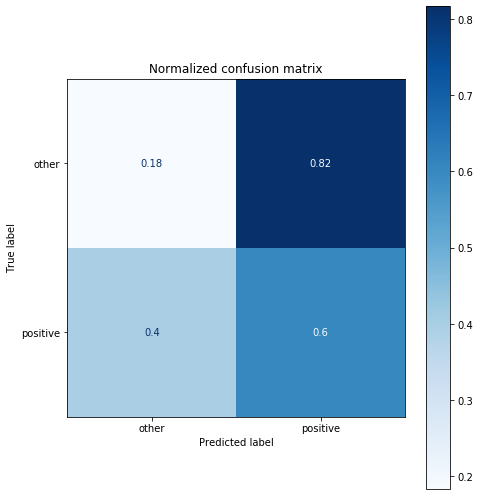

In [22]:
random = RandomForestClassifier(random_state=42)
# random = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth= 2, max_features= 10, min_samples_leaf= 3, min_samples_split= 2, n_estimators= 300)
random.fit(X_train, y_train)

level_names = ["other", "positive"]

# モデルの学習結果を評価する
accuracy = random.score(X_test, y_test)    # テストデータで試す
print(f"正答率{accuracy}")
predicted = random.predict(X_test)    # テストデータの分類結果
n_error = (y_test != predicted).sum()    # 正解と分類結果を比較する
print(f"誤った個数：{n_error}")

# 詳しいレポート
print("classification report")
print(metrics.classification_report(y_test, predicted))

#混同行列の作成
class_names = level_names
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(random, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.rcParams["figure.figsize"] = (7, 7)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    plt.tight_layout()
    plt.show()

# 特徴量選択

In [23]:
other = "0"
positive = "1"

X_train = pd.DataFrame(X_train)
X_train = X_train.reset_index(drop=True)
X_train_time = data2_d_record_all_feature_50.iloc[0:422]
X_train_time = X_train_time.iloc[0:,0:2]
X_train_time = X_train_time.reset_index(drop=True)
X_train_time = pd.concat([X_train_time, y_train], axis=1)
X_train_time.columns = ["start", "finish", "emotion_level"]
X_train_time.loc[X_train_time["emotion_level"] == "other", "label"] = 0
X_train_time.loc[X_train_time["emotion_level"] == "positive", "label"] = 1
X_train_time

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index(drop=True)
y_test_time = data2_d_record_all_feature_50.iloc[422:635]
y_test_time = y_test_time.iloc[0:,0:2]
y_test_time = y_test_time.reset_index(drop=True)
y_test_time = pd.concat([y_test_time, y_test], axis=1)
y_test_time.columns = ["start", "finish", "emotion_level"]
y_test_time.loc[y_test_time["emotion_level"] == "other", "label"] = 0
y_test_time.loc[y_test_time["emotion_level"] == "positive", "label"] = 1
y_test_time

predicted = pd.DataFrame(predicted)
predict_time = data2_d_record_all_feature_50.iloc[422:635]
predict_time = predict_time.iloc[0:,0:2]
predict_time = predict_time.reset_index(drop=True)
predict_time = pd.concat([predict_time, predicted], axis=1)
predict_time.columns = ["start", "finish", "emotion_level"]
predict_time.loc[predict_time["emotion_level"] == "other", "label"] = 0
predict_time.loc[predict_time["emotion_level"] == "positive", "label"] = 1
predict_time

,start,finish,emotion_level,label
0,2020-11-11 15:25:20,2020-11-11 15:25:24,positive,1.0
1,2020-11-11 15:25:21,2020-11-11 15:25:25,positive,1.0
2,2020-11-11 15:25:22,2020-11-11 15:25:26,other,0.0
3,2020-11-11 15:25:23,2020-11-11 15:25:27,positive,1.0
4,2020-11-11 15:25:24,2020-11-11 15:25:28,other,0.0
...,...,...,...,...
208,2020-11-11 15:29:48,2020-11-11 15:29:52,other,0.0
209,2020-11-11 15:29:49,2020-11-11 15:29:53,other,0.0
210,2020-11-11 15:29:50,2020-11-11 15:29:54,other,0.0
211,2020-11-11 15:29:51,2020-11-11 15:29:55,positive,1.0


In [24]:
y_test_time

,start,finish,emotion_level,label
0,2020-11-11 15:25:20,2020-11-11 15:25:24,positive,1.0
1,2020-11-11 15:25:21,2020-11-11 15:25:25,positive,1.0
2,2020-11-11 15:25:22,2020-11-11 15:25:26,positive,1.0
3,2020-11-11 15:25:23,2020-11-11 15:25:27,positive,1.0
4,2020-11-11 15:25:24,2020-11-11 15:25:28,positive,1.0
...,...,...,...,...
208,2020-11-11 15:29:48,2020-11-11 15:29:52,other,0.0
209,2020-11-11 15:29:49,2020-11-11 15:29:53,other,0.0
210,2020-11-11 15:29:50,2020-11-11 15:29:54,other,0.0
211,2020-11-11 15:29:51,2020-11-11 15:29:55,other,0.0


In [25]:
test = pd.concat([X_train_time, y_test_time], ignore_index=True, axis=0)
predicted = predict_time

In [26]:
test["start"] = pd.to_datetime(test['start'])
predicted["start"] = pd.to_datetime(predicted['start'])

test.set_index("start", inplace=True)
predicted.set_index("start", inplace=True)

In [27]:
test

,finish,emotion_level,label
start,,,
2020-11-11 15:15:26,2020-11-11 15:15:30,positive,1.0
2020-11-11 15:15:27,2020-11-11 15:15:31,positive,1.0
2020-11-11 15:15:28,2020-11-11 15:15:32,positive,1.0
2020-11-11 15:15:29,2020-11-11 15:15:33,positive,1.0
2020-11-11 15:15:30,2020-11-11 15:15:34,positive,1.0
...,...,...,...
2020-11-11 15:29:48,2020-11-11 15:29:52,other,0.0
2020-11-11 15:29:49,2020-11-11 15:29:53,other,0.0
2020-11-11 15:29:50,2020-11-11 15:29:54,other,0.0


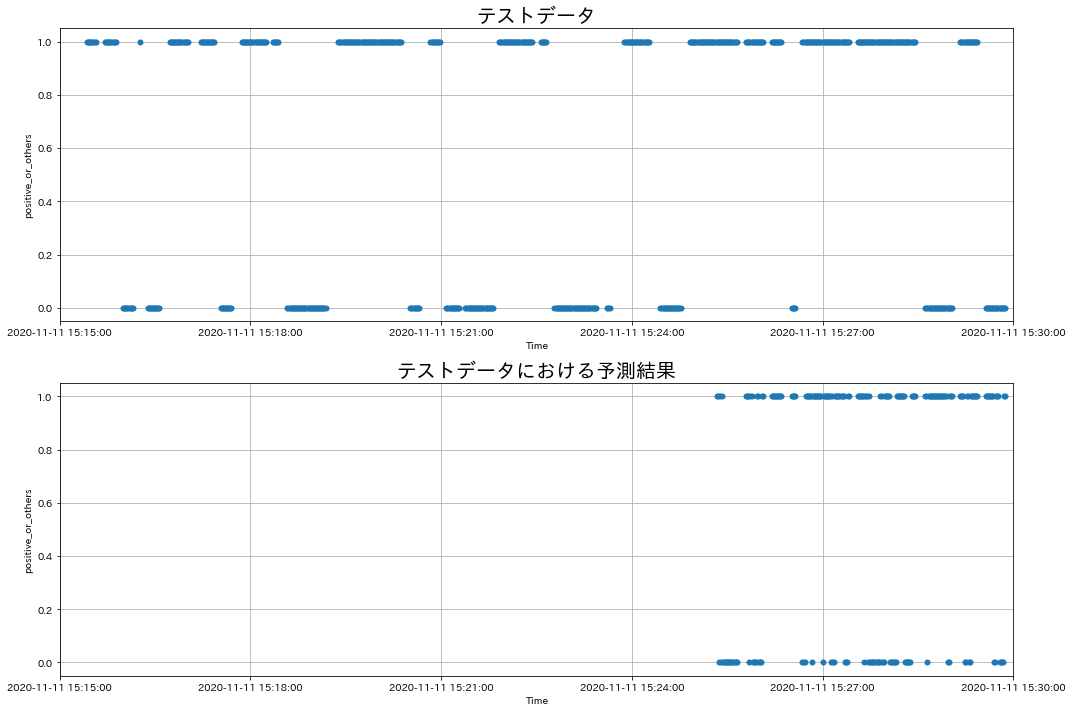

In [28]:
import datetime
import matplotlib.dates as mdates
import japanize_matplotlib

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(test.index, test["label"], marker="o", markeredgewidth=0,linewidth=0)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax1.set_xlim(datetime.datetime(2020,11,11,15,15,0), datetime.datetime(2020,11,11,15,30,0))
# ax1.set_ylim(0, 1)
ax1.xaxis.set_major_locator(mdates.MinuteLocator(range(15, 31, 3)))
ax1.set_title("テストデータ", fontsize=20)
ax1.set_xlabel("Time")
ax1.set_ylabel("positive_or_others")
ax1.grid(True)

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(predicted.index, predicted["label"], marker="o", markeredgewidth=0,linewidth=0)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax2.set_xlim(datetime.datetime(2020,11,11,15,15,0), datetime.datetime(2020,11,11,15,30,0))
ax2.xaxis.set_major_locator(mdates.MinuteLocator(range(15, 31, 3)))
ax2.set_title("テストデータにおける予測結果", fontsize=20)
ax2.set_xlabel("Time")
ax2.set_ylabel("positive_or_others")
ax2.grid(True)

plt.tight_layout()